In [2]:
from ultralytics import YOLO
from IPython.display import Image
import cv2
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# モデルの読み込み
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:13<00:00, 10.1MB/s] 


## lossが順調に下がっているのでもう少しepoch数を重ねてみる

In [6]:
# データセットの学習
# 前回の学習時は少し過学習気味だったのでdropout=0.1を入れてみる
# 前回の学習時はlossが下がって、さらに下がりそうだった。よって今回は400epochsにしてみる
results = model.train(data="data.yaml", epochs=400, imgsz=416, device=0, plots=True, dropout=0.1)

Ultralytics YOLOv8.2.2  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=400, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning C:\Users\yuuki\Kaggle\object_detection_try\shellfish_v2\after_data\train\labels.cache... 406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<?, ?it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\shellfish_v2\after_data\valid\labels... 116 images, 0 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<00:00, 1318.13it/s]

val: New cache created: C:\Users\yuuki\Kaggle\object_detection_try\shellfish_v2\after_data\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 400 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/400      6.51G      1.428      2.938      1.648         48        416: 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240     0.0423      0.467     0.0396     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/400      6.76G      1.744      2.943      1.953         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        116        240   0.000199     0.0172   0.000107   2.55e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/400       6.8G      1.821      2.853      1.994         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        116        240   4.22e-05     0.0049   2.15e-05   5.37e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/400      6.78G       1.86      2.794      1.979         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        116        240   2.29e-05    0.00245   1.16e-05   3.47e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/400      6.78G      1.872      2.776      2.004         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        116        240    0.00123      0.175   0.000783   0.000259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/400      6.79G       1.83      2.681      1.984         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        116        240     0.0109      0.184    0.00507    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/400      6.79G       1.79      2.649       1.96         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240    0.00851      0.459     0.0072    0.00264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/400      6.75G      1.802      2.687      1.998         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        116        240     0.0682      0.187     0.0479     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/400      6.78G      1.743      2.517      1.889         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240     0.0785      0.164     0.0417     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/400      6.76G      1.741       2.54      1.862         10        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        116        240      0.118      0.293     0.0931     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/400      6.78G      1.682      2.469      1.821         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240     0.0988     0.0136    0.00911    0.00575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/400      6.77G      1.694      2.456      1.821         49        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        116        240      0.124      0.284      0.116     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/400      6.79G      1.646      2.383      1.855         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.154      0.317      0.156     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/400      6.76G      1.591      2.354       1.81         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        116        240      0.158       0.31      0.151      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/400      6.79G      1.625       2.31      1.801         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.106      0.206     0.0697     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/400      6.79G      1.619      2.301      1.772         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        116        240      0.383      0.264      0.147     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/400      6.79G      1.591       2.41      1.767         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240       0.15      0.248      0.133     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/400      6.77G      1.546      2.252      1.738         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        116        240      0.134       0.39      0.178     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/400      6.77G      1.545       2.22      1.739         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.227      0.335      0.206     0.0984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/400      6.77G      1.516      2.228      1.702         35        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.173      0.454      0.178     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/400      6.79G      1.476      2.288      1.679         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        116        240      0.181       0.32      0.118     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/400      6.78G      1.471      2.176      1.688         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240      0.193      0.395      0.196     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/400      6.79G      1.513      2.231      1.748         14        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        116        240      0.286      0.325      0.229      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/400      6.79G      1.461      2.162       1.69         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        116        240      0.197      0.314      0.179     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/400      6.77G      1.494      2.179       1.71         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        116        240      0.146      0.352      0.139     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/400      6.77G      1.458      2.167      1.684         10        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240      0.203      0.387      0.203     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/400      6.78G      1.444       2.12      1.669         11        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240      0.243      0.451      0.265      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/400      6.76G      1.401      2.132       1.68         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.283      0.319      0.179     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/400      6.79G       1.42      2.075      1.687         17        416: 100%|██████████| 26/26 [00:10<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        116        240      0.214       0.46      0.225      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/400      6.77G      1.442      2.142      1.696         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        116        240       0.18      0.424      0.201      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/400       6.8G      1.414      2.033      1.676         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.263      0.388      0.218     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/400      6.78G      1.418      2.094      1.675         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        116        240      0.245       0.46      0.249      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/400      6.78G      1.409      2.036       1.65         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.242      0.413      0.259      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/400      6.79G      1.404      1.991      1.649         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        116        240      0.219       0.48      0.247      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/400      6.79G      1.394      2.012       1.66         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.273      0.358      0.267       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/400      6.77G      1.343      1.952      1.607         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.362      0.455      0.356      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/400      6.77G      1.357      1.979      1.626         43        416: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        116        240      0.356      0.432      0.333      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/400      6.77G      1.405      1.986      1.655         11        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240      0.347      0.385      0.303      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/400      6.79G      1.346      1.993       1.62         42        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        116        240      0.342      0.441      0.298      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/400      6.78G      1.326      1.879        1.6         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240       0.21      0.394      0.195      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/400      6.79G      1.323      1.937      1.625         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240       0.33      0.399      0.318      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/400      6.77G       1.32      1.899      1.602         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        116        240      0.249      0.435      0.258      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/400      6.79G      1.313      1.918      1.592         23        416: 100%|██████████| 26/26 [00:10<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.301      0.402      0.245      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/400      6.79G      1.317      1.898      1.579         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240      0.403      0.344       0.31      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/400      6.79G      1.298      1.867      1.578         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        116        240      0.363      0.302      0.295      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/400      6.78G      1.313       1.89      1.583         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240       0.42      0.313      0.313      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/400      6.77G      1.274      1.791      1.544         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.333      0.451      0.301      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/400      6.77G      1.291      1.873      1.569         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.361      0.396      0.304      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/400      6.79G      1.288      1.812      1.553         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.383      0.357      0.317       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/400      6.78G       1.27      1.857      1.551         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        116        240      0.373      0.352      0.308      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/400      6.79G      1.255      1.785      1.532         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        116        240      0.403      0.286      0.311      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/400      6.77G      1.246      1.812      1.527         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        116        240      0.393       0.34      0.314       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/400      6.78G      1.246      1.827      1.543         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        116        240      0.429      0.362      0.322      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/400      6.77G      1.237      1.781      1.529         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        116        240       0.32      0.419      0.342      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/400      6.79G      1.232      1.759      1.548         35        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        116        240      0.358      0.417      0.339      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/400      6.78G      1.291      1.787      1.554         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.464      0.382      0.342      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/400      6.78G      1.223       1.71      1.531         10        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240       0.46      0.382      0.354      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/400      6.76G      1.239      1.705      1.524         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.421      0.329      0.317      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/400      6.79G      1.243      1.696      1.527         32        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.477      0.304      0.316      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/400      6.77G      1.245      1.695      1.566         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        116        240       0.48       0.43      0.384      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/400      6.77G      1.236      1.658      1.509         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        116        240       0.35      0.462      0.367      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/400      6.77G      1.169      1.653      1.483         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.404      0.366      0.331      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/400      6.79G      1.217      1.613      1.495         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        116        240      0.451      0.403      0.364      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/400      6.78G      1.214      1.659       1.51         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.302      0.417      0.328      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/400      6.79G       1.17      1.619      1.474         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.465      0.459      0.395      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/400      6.78G      1.136      1.554      1.447         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        116        240      0.405      0.393      0.336      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/400      6.77G      1.175      1.582      1.466         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.371      0.506      0.364      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/400      6.79G      1.221      1.686      1.518         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        116        240      0.458      0.447      0.406      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/400      6.79G      1.151      1.558       1.46         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.506      0.439      0.393      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/400      6.77G      1.146      1.524      1.458         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.413      0.336      0.336       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/400      6.78G      1.128      1.493      1.435         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        116        240      0.418      0.492      0.412       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/400       6.8G      1.103      1.496      1.408         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.483      0.312      0.312      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/400      6.79G      1.078      1.409      1.402         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.564      0.439      0.458      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/400      6.77G      1.134      1.511      1.442         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.569      0.326      0.376      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/400      6.79G       1.12      1.557      1.453         50        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240      0.456      0.456      0.415       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/400      6.76G      1.098      1.505      1.434         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        116        240      0.504       0.37      0.352      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/400      6.79G      1.099      1.509      1.432         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.485      0.385       0.38      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/400      6.79G      1.094       1.44      1.413         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240       0.48      0.376      0.381      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/400      6.78G      1.093      1.444       1.41         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        116        240      0.525      0.382      0.382      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/400      6.78G      1.098      1.514       1.44         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        116        240      0.593      0.345      0.409      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/400      6.78G      1.101      1.482      1.434         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.344      0.418      0.318      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/400      6.77G      1.094      1.442      1.436         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.422      0.454      0.373      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/400      6.78G      1.046      1.356      1.374         12        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240       0.45      0.389      0.399      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/400      6.78G       1.07      1.392      1.407         36        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.478      0.405      0.358      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/400      6.78G      1.046      1.402      1.383         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        116        240      0.649      0.365       0.42      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/400      6.78G      1.057       1.46        1.4         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        116        240      0.522      0.412      0.417      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/400      6.78G      1.083      1.405        1.4         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        116        240      0.593       0.37      0.416      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/400      6.77G      1.055      1.343      1.386         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.495      0.391      0.375      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/400      6.78G      1.061      1.334      1.416         19        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        116        240      0.407      0.432      0.375      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/400      6.78G      1.022      1.306      1.373         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240       0.49      0.368      0.368      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/400      6.79G      1.017      1.312      1.369         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.513       0.42      0.402      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/400      6.76G     0.9831      1.289      1.334         36        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        116        240      0.468      0.415      0.413      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/400      6.79G      1.005      1.299      1.358         42        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240       0.46      0.361      0.386      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/400      6.78G      1.001      1.285      1.356         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        116        240      0.437      0.402       0.39      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/400      6.79G      1.014      1.293      1.352         16        416: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.441      0.458      0.408      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/400      6.81G      1.024      1.306      1.363         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        116        240      0.542      0.398       0.42       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/400      6.78G     0.9948      1.257      1.346         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240      0.555      0.381      0.385      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/400       6.8G      1.019      1.276      1.376         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.429      0.452      0.409      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/400      6.77G      1.036      1.259      1.387         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        116        240       0.42      0.431      0.388      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/400      6.78G     0.9879      1.243      1.345         32        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.504      0.422        0.4      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/400      6.79G     0.9737      1.209      1.329         21        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.483      0.428      0.387      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/400      6.79G     0.9646      1.236       1.33         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.517      0.395      0.379      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/400      6.79G     0.9645       1.18      1.321         34        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.424      0.382      0.358      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/400      6.76G     0.9576      1.304       1.33         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        116        240      0.421      0.429      0.415      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/400      6.79G      0.948      1.244      1.316         37        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.434      0.439       0.38      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/400      6.78G     0.9643      1.169      1.306         41        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.468      0.419      0.379      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/400      6.79G     0.9469      1.227      1.323         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240      0.604      0.376      0.438       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/400      6.77G     0.9334      1.166      1.303         34        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.508       0.39      0.392       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/400      6.79G     0.9689      1.223      1.361         13        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.602      0.375      0.429      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/400      6.77G     0.9454      1.166      1.309         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240       0.51      0.425      0.422      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/400      6.79G     0.9423      1.183       1.32         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        116        240      0.451      0.473      0.405      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/400      6.77G     0.9195      1.118      1.302         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        116        240      0.399      0.456      0.377      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/400      6.79G     0.9296      1.139      1.313         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.462      0.386      0.359      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/400      6.79G     0.9103      1.141      1.291         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        116        240      0.596      0.373       0.39      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/400      6.79G     0.9359      1.128      1.324         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        116        240      0.569      0.355      0.393      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/400      6.76G     0.9567      1.131      1.317         19        416: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        116        240      0.461      0.436      0.404      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/400      6.78G     0.9066      1.103      1.277         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240      0.421      0.447        0.4       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/400      6.78G       0.91      1.089      1.285         32        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240      0.485      0.413       0.39      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/400      6.79G     0.9291      1.105      1.302         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        116        240      0.482      0.367       0.37      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/400      6.77G     0.8834       1.05      1.247         37        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240      0.426       0.41      0.373      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/400      6.79G     0.8869      1.047      1.271         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240      0.513      0.422      0.417       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/400      6.78G     0.9069      1.117      1.286         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        116        240      0.368      0.477      0.394      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/400      6.77G     0.8864      1.074      1.268         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.573      0.417       0.44      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/400      6.78G     0.8851      1.057      1.278         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        116        240      0.477      0.446      0.425      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/400      6.79G     0.9101      1.097      1.292         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.391      0.422      0.369      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/400      6.78G     0.8834      1.027      1.269         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        116        240      0.479      0.497      0.483      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/400      6.79G     0.8713      1.001      1.268         11        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.561      0.396      0.421      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/400      6.78G      0.909      1.057      1.295         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        116        240      0.422       0.43      0.385      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/400      6.78G     0.8834      1.013      1.256         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        116        240      0.616      0.354      0.385      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/400      6.77G     0.8583      1.019      1.257         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        116        240      0.518      0.411      0.385      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/400      6.79G     0.8764      1.029      1.258         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        116        240      0.532       0.44      0.438      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/400      6.77G     0.8166     0.9746      1.212         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        116        240      0.548      0.388      0.412      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/400      6.79G     0.8518     0.9819      1.258         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        116        240      0.524      0.394      0.426      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/400      6.77G     0.8635      1.022      1.277         28        416: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.408      0.473      0.384      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/400      6.79G     0.8289     0.9574      1.238         38        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.585      0.375       0.42      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/400      6.77G     0.8433      1.028      1.245         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.589      0.351      0.421      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/400      6.79G     0.7996     0.9605      1.217         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.455      0.441      0.405      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/400      6.78G      0.806     0.9243       1.23         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240       0.52      0.433      0.408      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/400      6.79G     0.8197     0.9427       1.21         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.454      0.429      0.373      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/400      6.77G     0.8425     0.9907      1.236         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.551      0.394      0.432      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/400      6.79G     0.7963      0.933      1.224         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.581      0.379      0.407       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/400      6.77G     0.7942     0.8878      1.195         61        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        116        240      0.483      0.341      0.356      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/400       6.8G     0.8039     0.9166      1.211         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240       0.49      0.459      0.442      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/400      6.77G     0.8339     0.9285      1.223         45        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.486      0.416      0.421      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/400      6.79G     0.8225     0.9222      1.218         45        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        116        240      0.543      0.379      0.393      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/400      6.78G     0.7946     0.9028      1.204         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        116        240      0.665       0.37      0.445      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/400      6.77G     0.7775     0.8789        1.2         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.512      0.506      0.458      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/400      6.77G     0.7878     0.8647        1.2         38        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240       0.55      0.416      0.437      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/400      6.79G     0.7981     0.8688      1.215         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240      0.615      0.402      0.447      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/400      6.77G     0.8015     0.9154      1.218         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        116        240      0.573      0.443      0.456      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/400      6.79G     0.7654     0.8996      1.191         36        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.555      0.432      0.471      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/400      6.78G     0.7545     0.8862      1.191         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.454      0.495      0.444      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/400      6.79G     0.7852     0.9064      1.207         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240       0.45      0.444      0.408       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/400      6.77G     0.8155     0.9472      1.232         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        116        240      0.491      0.444      0.406      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/400      6.79G     0.7925     0.9227      1.195         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.481      0.496      0.456      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/400      6.78G     0.7364     0.8204      1.157         34        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.624      0.355      0.425      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/400      6.77G     0.7965     0.8844      1.207         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240       0.52      0.428      0.451      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/400      6.78G     0.7331     0.8634      1.172         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        116        240      0.561      0.407      0.421       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/400      6.79G     0.7698     0.8605      1.186         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.559      0.372      0.427       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/400      6.76G     0.7344     0.8087      1.158         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.488      0.417      0.416      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/400      6.79G     0.7334     0.8481      1.176         36        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.511      0.401      0.432      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/400      6.78G     0.7301     0.8059      1.165         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        116        240       0.45      0.412       0.39      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/400      6.79G     0.7649     0.8492      1.174         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.468      0.439      0.407       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/400      6.78G     0.7533     0.8276      1.179         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.556      0.464      0.457      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/400       6.8G     0.7156     0.8045      1.166         35        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240      0.599      0.387        0.4      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/400      6.81G     0.7424     0.7928      1.157         20        416: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        116        240      0.461      0.465      0.445      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/400      6.79G     0.7171      0.806      1.148         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.636      0.358      0.442       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/400      6.77G     0.7104      0.788      1.162         21        416: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        116        240      0.575      0.439      0.452      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/400      6.79G     0.7352     0.8515      1.166         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.501      0.404       0.42       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/400      6.77G     0.7106     0.7902      1.153         45        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.529      0.402      0.443      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/400      6.79G     0.7265      0.845      1.165         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240       0.61      0.422      0.471      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/400      6.78G     0.7156     0.7839      1.159         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.447      0.454      0.404      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/400      6.79G     0.6941     0.7672      1.123         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240      0.453      0.483      0.414      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/400      6.78G     0.7331     0.8232      1.165         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        116        240      0.457      0.483      0.471      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/400      6.79G      0.703     0.7998      1.144         37        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.551      0.416      0.453      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/400      6.79G     0.7222     0.8055      1.156         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.683      0.369       0.46      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/400      6.78G     0.7268     0.7742      1.156         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.544      0.443      0.459      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/400      6.78G     0.7098     0.7775      1.151         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        116        240      0.499      0.408      0.412      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/400      6.79G      0.711     0.7509       1.15         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.587      0.401      0.452      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/400      6.79G     0.7133     0.7692      1.152         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.585      0.384       0.45      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/400      6.79G     0.6865     0.7517      1.136         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.602      0.433      0.482      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/400      6.78G     0.6789     0.7099      1.132         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.529      0.421      0.433      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/400      6.79G     0.6977     0.7619      1.142         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240      0.463      0.484      0.417       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/400      6.78G     0.6767     0.7369       1.12         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        116        240      0.381      0.419       0.36      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/400      6.79G     0.6687      0.736      1.126         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.487       0.45      0.441      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/400      6.77G     0.6697     0.7649      1.132         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        116        240      0.567      0.421       0.46      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/400      6.79G     0.6587     0.7026      1.109         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        116        240       0.54      0.418      0.428      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/400      6.77G     0.6766     0.7204      1.132         40        416: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240      0.594       0.38      0.427      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/400      6.78G     0.6595     0.7114      1.107         37        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.551      0.411      0.453      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/400      6.78G     0.6653      0.763      1.119         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.555      0.399       0.44      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/400      6.78G     0.6586     0.7111      1.124         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.526      0.447      0.418      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/400      6.78G     0.6729     0.7076      1.144         35        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.501       0.45      0.453      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/400      6.79G     0.6484     0.7116      1.117         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.591      0.392      0.432      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/400      6.79G     0.6327     0.7064      1.102         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.619      0.358      0.397      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/400      6.79G      0.662     0.7037       1.12         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.604      0.394      0.455      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/400      6.76G      0.669     0.7392      1.132         13        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        116        240       0.56      0.458      0.456      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/400      6.79G     0.6331     0.7014      1.112         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240      0.537      0.492      0.461      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/400      6.77G      0.654     0.6915      1.111         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.554      0.404      0.425       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/400      6.79G     0.6454     0.6907      1.116         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240       0.54      0.449      0.443      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/400      6.77G      0.625     0.6879      1.105         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        116        240       0.53      0.412      0.454      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/400      6.79G     0.6265     0.7115      1.115         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240       0.54      0.442      0.472      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/400      6.76G     0.6304     0.6807      1.083         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.589      0.442      0.481      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/400      6.79G     0.6254     0.6706      1.082         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        116        240      0.538      0.444      0.451      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/400      6.78G     0.6321     0.6688      1.106         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.561       0.43      0.468      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/400      6.79G     0.6179     0.6508      1.077         35        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.589      0.448       0.47       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/400      6.78G     0.6273     0.6882      1.092         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.584      0.388      0.417      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/400      6.79G     0.6228     0.6676      1.092         44        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.525      0.394      0.417      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/400      6.77G     0.6132     0.6669      1.085         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.525      0.449      0.403      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/400      6.79G     0.6206     0.6649      1.088         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.517       0.41      0.413       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/400      6.77G     0.6059     0.6755      1.095         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.608      0.424      0.443      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/400      6.78G     0.6356     0.6866      1.123         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.599      0.368      0.402      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/400      6.78G     0.6364     0.7152      1.108         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240       0.53      0.404      0.411      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/400      6.79G     0.6127     0.6621      1.093         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.553       0.46      0.457      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/400      6.78G     0.6089      0.652      1.097         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        116        240       0.58      0.433      0.456       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/400      6.77G      0.622     0.6556      1.092         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.586      0.424      0.456      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/400      6.79G     0.6273     0.6729      1.109         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        116        240      0.606      0.414      0.436      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/400       6.8G     0.5959      0.644      1.095         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.631      0.355      0.405      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/400      6.77G     0.6067     0.6529      1.083         46        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240        0.6      0.368      0.433      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/400      6.79G     0.5912     0.6523      1.078         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        116        240      0.434      0.486      0.414      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/400      6.77G     0.6322     0.6872       1.11         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.553      0.409       0.41      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/400      6.79G     0.6005      0.674      1.087         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.565      0.413      0.443      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/400      6.77G     0.5922     0.6432      1.082         39        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        116        240      0.527      0.426      0.455      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/400      6.79G     0.5971       0.64      1.083         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.449      0.444      0.384      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/400      6.79G     0.5887     0.6045      1.082         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.537      0.378      0.414      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/400      6.78G     0.5693     0.6188      1.067         45        416: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.507      0.501      0.454      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/400      6.78G     0.5955      0.634      1.078         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240       0.53       0.44      0.423       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/400      6.79G     0.5899     0.6185      1.066         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.631      0.386      0.416      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/400      6.78G     0.5796     0.6288      1.072         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        116        240      0.542      0.449      0.453      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/400      6.79G     0.5682     0.5941      1.078         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.597      0.404      0.453      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/400      6.77G     0.5793     0.6146      1.073         32        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240      0.587      0.405       0.45      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/400      6.77G     0.6017     0.6251       1.09         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.582      0.497      0.527      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/400      6.77G     0.5803     0.6102      1.079         26        416: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.585      0.448      0.469      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/400      6.79G     0.5842      0.614      1.078         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.572       0.46      0.448      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/400      6.78G     0.5471     0.5879      1.056         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.665      0.413      0.489      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/400      6.79G     0.5979     0.6131      1.087         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.486      0.479      0.469      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/400      6.78G     0.5731     0.5884      1.061         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        116        240      0.603      0.406      0.465      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/400      6.78G     0.5797      0.617       1.08         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        116        240       0.57      0.454      0.479      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/400      6.79G     0.5574      0.601      1.066         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        116        240      0.492      0.446      0.444      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/400      6.77G     0.5613     0.6064      1.072         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240       0.59      0.402      0.395      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/400      6.77G     0.5658     0.5867      1.059         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        116        240      0.604      0.387      0.439       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/400      6.78G     0.5753     0.6072      1.078         39        416: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240       0.54      0.376      0.407      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/400      6.76G     0.5624     0.5665       1.06         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.644      0.354      0.442      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/400      6.78G     0.5632     0.5647      1.057         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        116        240       0.49      0.444      0.434      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/400      6.78G     0.5552     0.5776      1.065         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        116        240       0.63      0.424      0.465      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/400      6.77G     0.5404     0.5593      1.059         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        116        240       0.51      0.431      0.453       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/400      6.78G     0.5598     0.5527      1.054         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240      0.574      0.445      0.454      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/400      6.79G     0.5554     0.5849      1.071         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.535      0.434      0.449      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/400      6.77G      0.546     0.5826       1.06         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.605      0.403      0.446      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/400      6.78G     0.5431     0.5385      1.048         31        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.582      0.442      0.451      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/400      6.77G     0.5371     0.5645      1.052         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240        0.6       0.41      0.464      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/400      6.78G     0.5283     0.5602      1.046         51        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        116        240      0.565      0.383      0.459      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/400      6.78G     0.5365     0.5641      1.047         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        116        240      0.488      0.452      0.438      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/400      6.79G     0.5272     0.5839      1.049         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240      0.542      0.383      0.385      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/400      6.77G      0.531     0.5414      1.034         42        416: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240      0.563      0.401      0.426      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/400      6.79G     0.5259     0.5541      1.047         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.633      0.406      0.454      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/400      6.79G     0.5262     0.5267       1.03         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        116        240      0.656      0.404      0.475      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/400      6.78G     0.5095     0.5388      1.046         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        116        240      0.585      0.401      0.457      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/400      6.77G     0.5277     0.5532      1.043         36        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        116        240      0.649      0.385      0.456      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/400      6.79G     0.5175     0.5446      1.046         10        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240      0.538      0.505      0.487      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/400       6.8G     0.5184     0.5633      1.042         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.691      0.423      0.501      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/400      6.78G     0.5103     0.5492      1.053         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240      0.666      0.415      0.473      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/400      6.77G     0.5166     0.5541      1.054         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240       0.59      0.386      0.457      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/400      6.78G     0.5257     0.5282      1.036         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.516      0.448      0.444      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/400       6.8G      0.534     0.5375      1.063         32        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        116        240      0.399      0.477      0.411      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/400      6.77G     0.5153     0.5271      1.036         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        116        240      0.469      0.453      0.446      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/400      6.78G     0.5253     0.5442      1.055         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.587      0.422      0.463      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/400      6.78G     0.5156      0.524      1.033         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        116        240      0.553      0.438      0.456      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/400      6.77G     0.5284     0.5328       1.05         35        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.461      0.487      0.444      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/400      6.78G     0.5005     0.5159      1.031         47        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        116        240       0.59      0.404      0.461      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/400      6.78G     0.5137      0.558      1.043         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        116        240      0.484      0.464      0.457        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/400      6.79G     0.5077       0.52      1.028         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.538      0.434      0.454      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/400      6.78G     0.5145     0.5181      1.031         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        116        240      0.513      0.451      0.472      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/400      6.77G     0.5014     0.5121      1.032         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        116        240      0.629      0.344      0.422      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/400      6.77G     0.5049     0.5335      1.022         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        116        240      0.531      0.413       0.44      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/400      6.79G     0.5116     0.5336      1.047         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        116        240      0.621      0.433      0.456      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/400      6.77G       0.48     0.4976       1.01         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        116        240      0.682      0.416      0.486      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/400      6.79G     0.4867     0.4887      1.019         25        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.581      0.447      0.464      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/400      6.78G     0.5113     0.5353      1.044         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.511      0.485       0.47      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/400      6.79G     0.5005     0.5061      1.028         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        116        240      0.547      0.451      0.484      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/400      6.77G     0.5155     0.5376      1.049         13        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        116        240      0.625      0.411      0.473      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/400      6.79G     0.4758     0.4847      1.016         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        116        240      0.579      0.452      0.465      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/400      6.79G     0.4805     0.4921      1.016         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        116        240      0.502      0.453      0.446      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/400      6.79G     0.4953     0.4878      1.018         24        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        116        240      0.549      0.402      0.441      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/400      6.78G     0.4682      0.484      1.014         13        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240       0.48      0.445      0.443      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/400      6.79G     0.4767     0.4937      1.027         35        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.567      0.408      0.438      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/400      6.77G     0.4896     0.5112      1.036         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.534      0.443      0.433      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/400      6.77G     0.4737     0.5081      1.017         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.553      0.426      0.446      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/400      6.77G     0.4738     0.4673      1.006         33        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240       0.52      0.425      0.446      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/400      6.79G     0.4869     0.5069      1.021         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        116        240      0.545      0.398      0.427       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/400      6.77G     0.4572     0.4634     0.9949         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.575       0.38      0.441      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/400      6.78G     0.4785     0.4848      1.012         52        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        116        240      0.592      0.392      0.442      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/400      6.78G     0.4666     0.4549      1.008         34        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240      0.514      0.436      0.431      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/400      6.79G     0.4543     0.4671      1.002         17        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.498      0.418      0.409      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/400      6.78G     0.4735     0.4768      1.014         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        116        240      0.663      0.397      0.461       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/400      6.78G     0.4597     0.4696      1.008         28        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        116        240      0.633      0.418       0.45      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/400      6.78G     0.4597     0.4628      1.002         15        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        116        240      0.491      0.438       0.42      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/400      6.79G     0.4776      0.484      1.017         29        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240       0.56      0.412      0.417      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/400      6.77G     0.4621     0.4485      1.004         21        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        116        240      0.673      0.394      0.433       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/400      6.79G     0.4762     0.4953      1.021         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.579      0.343      0.404      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/400      6.77G     0.4607     0.4821       1.01         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.641      0.354      0.437      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/400       6.8G     0.4924     0.4831      1.038         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.736      0.365      0.442      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/400      6.78G     0.4578     0.4781      1.014         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        116        240       0.54       0.45       0.44      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/400       6.8G     0.4499     0.4541      1.005         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        116        240      0.558      0.481      0.458      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/400      6.77G     0.4462     0.4527      1.007         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        116        240       0.55      0.438      0.451      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/400      6.79G     0.4419     0.4368      0.994         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        116        240      0.549      0.407      0.452      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/400      6.79G     0.4567     0.4592      1.005         34        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        116        240      0.646      0.392      0.457      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/400      6.78G     0.4547     0.4513     0.9976         20        416: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.515      0.422      0.435      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/400      6.77G      0.445     0.4323     0.9932         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        116        240      0.527      0.385      0.415      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/400      6.78G     0.4504      0.452      1.004         18        416: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        116        240      0.458      0.444      0.422      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/400      6.79G     0.4456     0.4555     0.9905         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        116        240      0.476      0.446      0.439      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/400      6.77G     0.4443     0.4566      1.001         23        416: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.547      0.425      0.456      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/400      6.78G     0.4578     0.4538      1.008         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        116        240      0.507      0.447      0.458      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/400      6.79G     0.4644     0.4729      1.009         16        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        116        240      0.525       0.45      0.467      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/400      6.77G      0.422     0.4461     0.9938         37        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.514      0.451      0.463      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/400      6.78G     0.4404     0.4398     0.9946         19        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        116        240      0.599      0.384      0.455      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/400      6.77G     0.4286      0.426     0.9806         36        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        116        240      0.595      0.414      0.448      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/400      6.79G      0.435     0.4315     0.9924         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        116        240      0.519      0.479      0.473      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/400      6.77G     0.4215      0.429     0.9921         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        116        240        0.5      0.467      0.452      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/400      6.79G     0.4413     0.4417      1.002         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        116        240      0.663      0.365      0.425      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/400      6.77G     0.4504     0.4725      1.012         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        116        240        0.6      0.384      0.437      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/400      6.78G     0.4309     0.4325     0.9846         26        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        116        240      0.644      0.337      0.423      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/400      6.77G     0.4306     0.4263     0.9916         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        116        240      0.419      0.443      0.421       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/400      6.79G      0.418     0.4155      0.981         27        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        116        240      0.582       0.35      0.413      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/400      6.77G      0.427     0.4274     0.9966         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        116        240      0.633      0.343      0.417      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/400      6.79G      0.411     0.4039     0.9851         30        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        116        240      0.572      0.393      0.438      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/400      6.77G     0.4156     0.4233     0.9869         20        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        116        240      0.524      0.426      0.449      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/400      6.77G     0.4429     0.4311          1         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.707      0.363       0.43      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/400      6.78G     0.4098     0.4109     0.9782         24        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        116        240      0.536      0.417      0.441      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/400      6.78G     0.4151     0.4243     0.9824         22        416: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        116        240      0.503      0.454      0.446      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/400      6.75G     0.4303     0.4355     0.9996         14        416: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        116        240      0.599      0.414      0.452      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/400      6.79G      0.411     0.4022     0.9774         37        416: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        116        240      0.555      0.404      0.442      0.269
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 231, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



331 epochs completed in 1.343 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 136.8MB
Optimizer stripped from runs\detect\train\weights\best.pt, 136.7MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.2  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]


                   all        116        240      0.584      0.495      0.526      0.305
                  Crab        116         44      0.617      0.586      0.658      0.389
               Lobster        116         60      0.605      0.517      0.524      0.307
                Shrimp        116        136      0.528      0.382      0.395      0.219
Speed: 0.2ms preprocess, 10.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train


## 正解データと検証データの比較

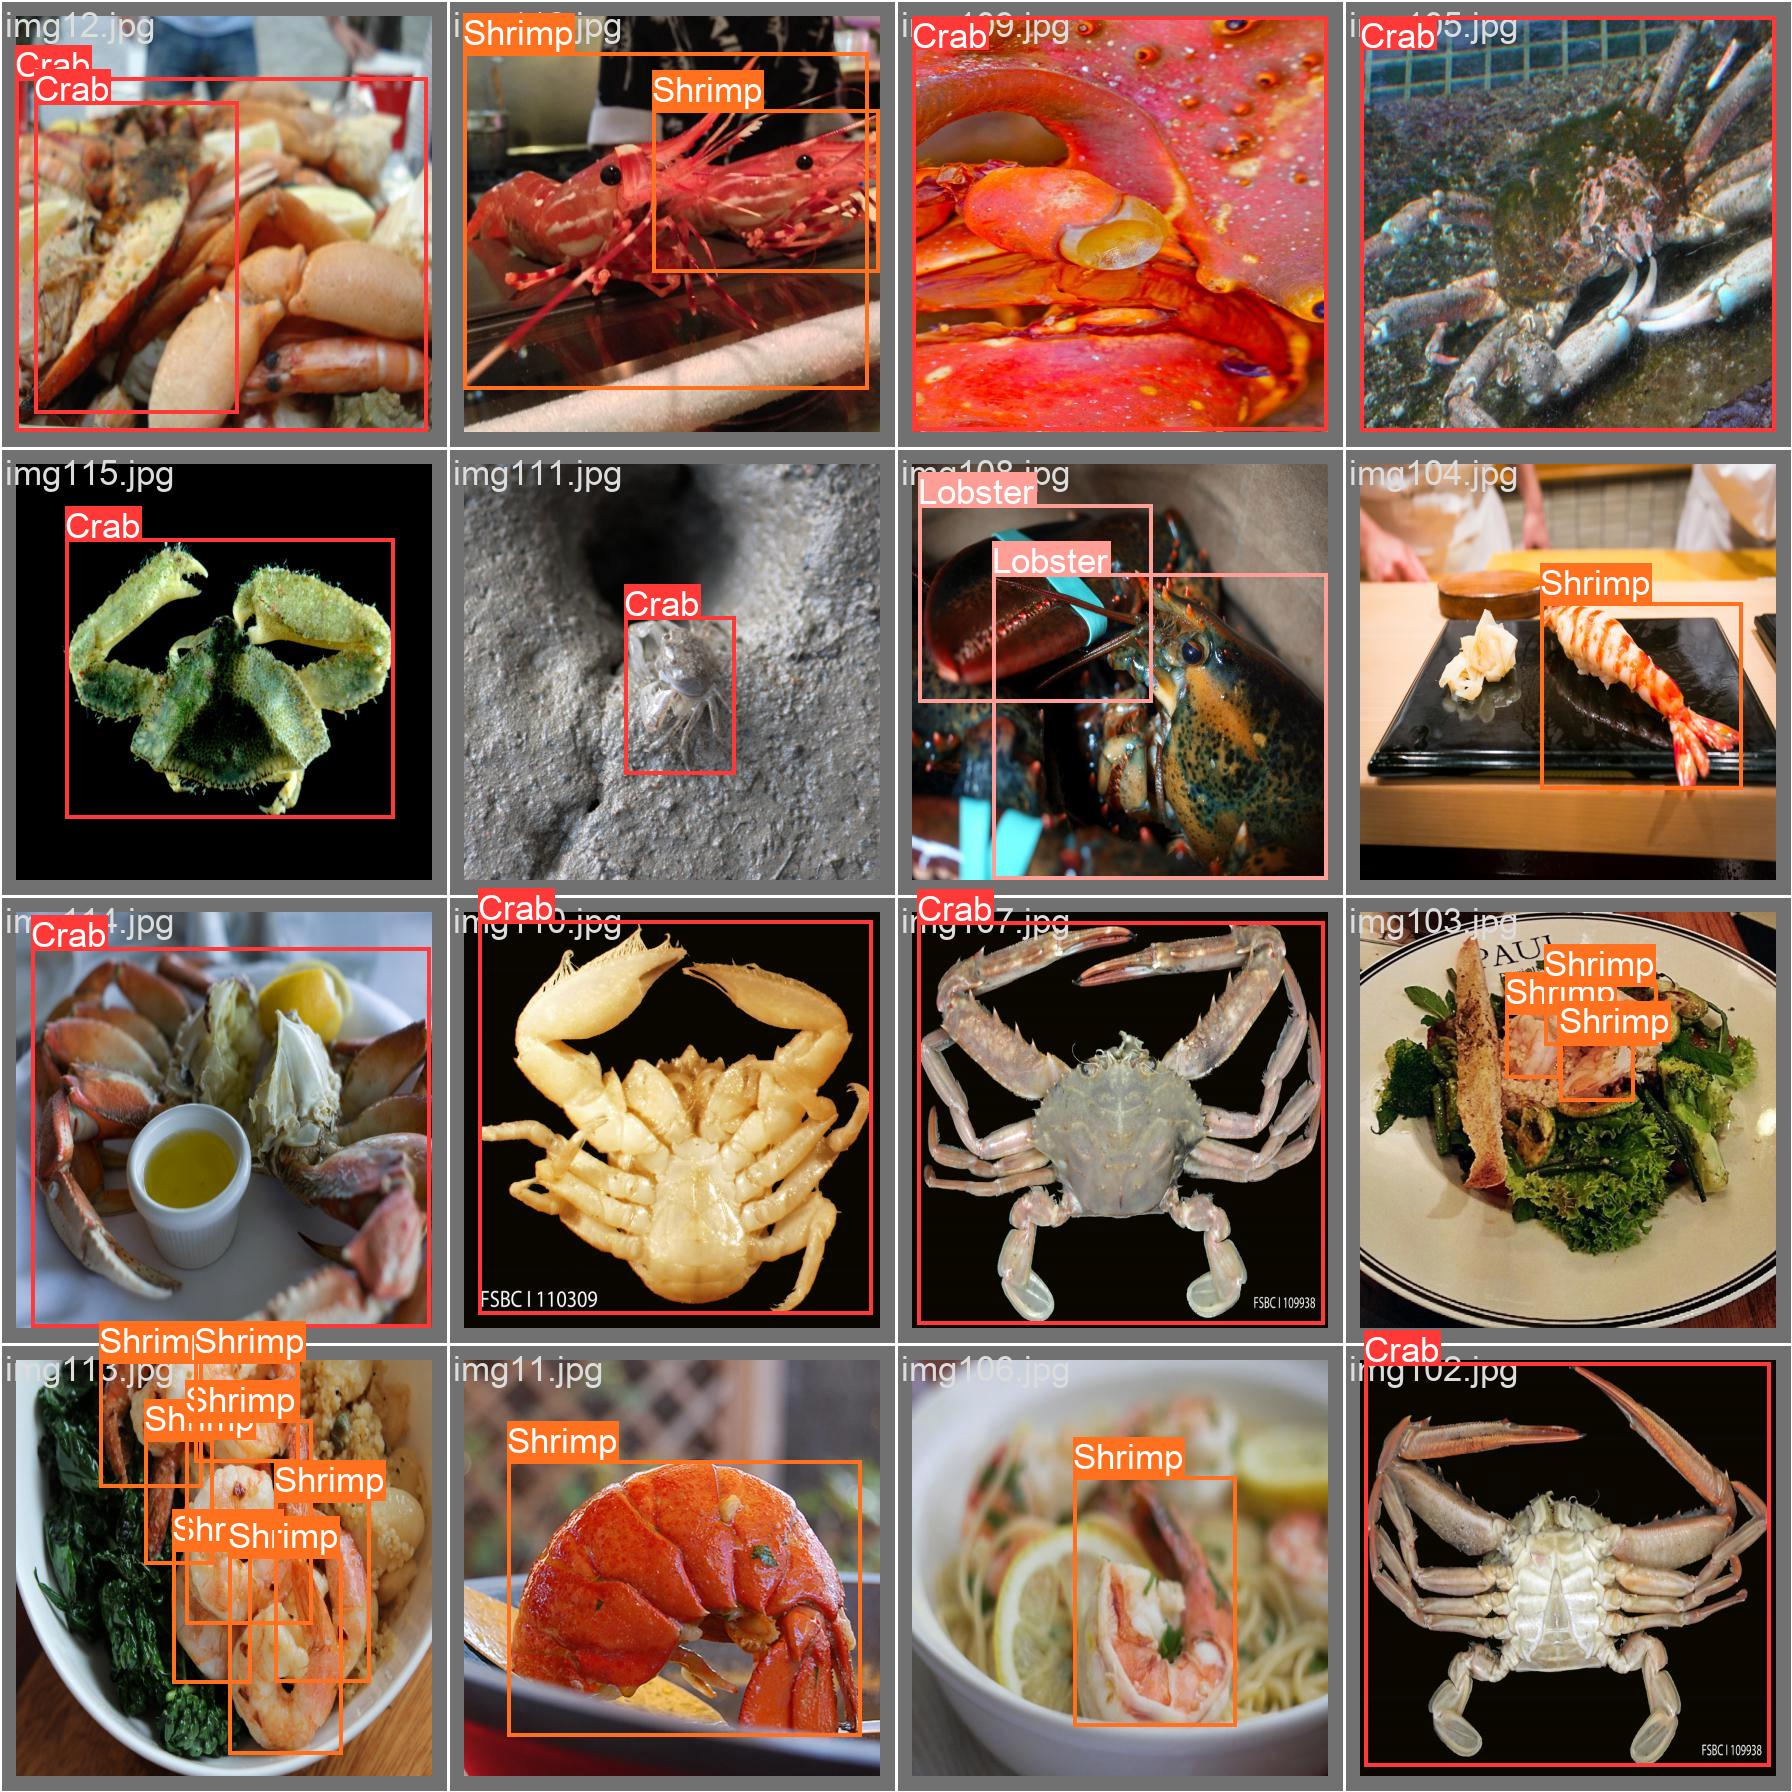

In [3]:
# 正解データ
Image("runs/detect/train/val_batch2_labels.jpg")

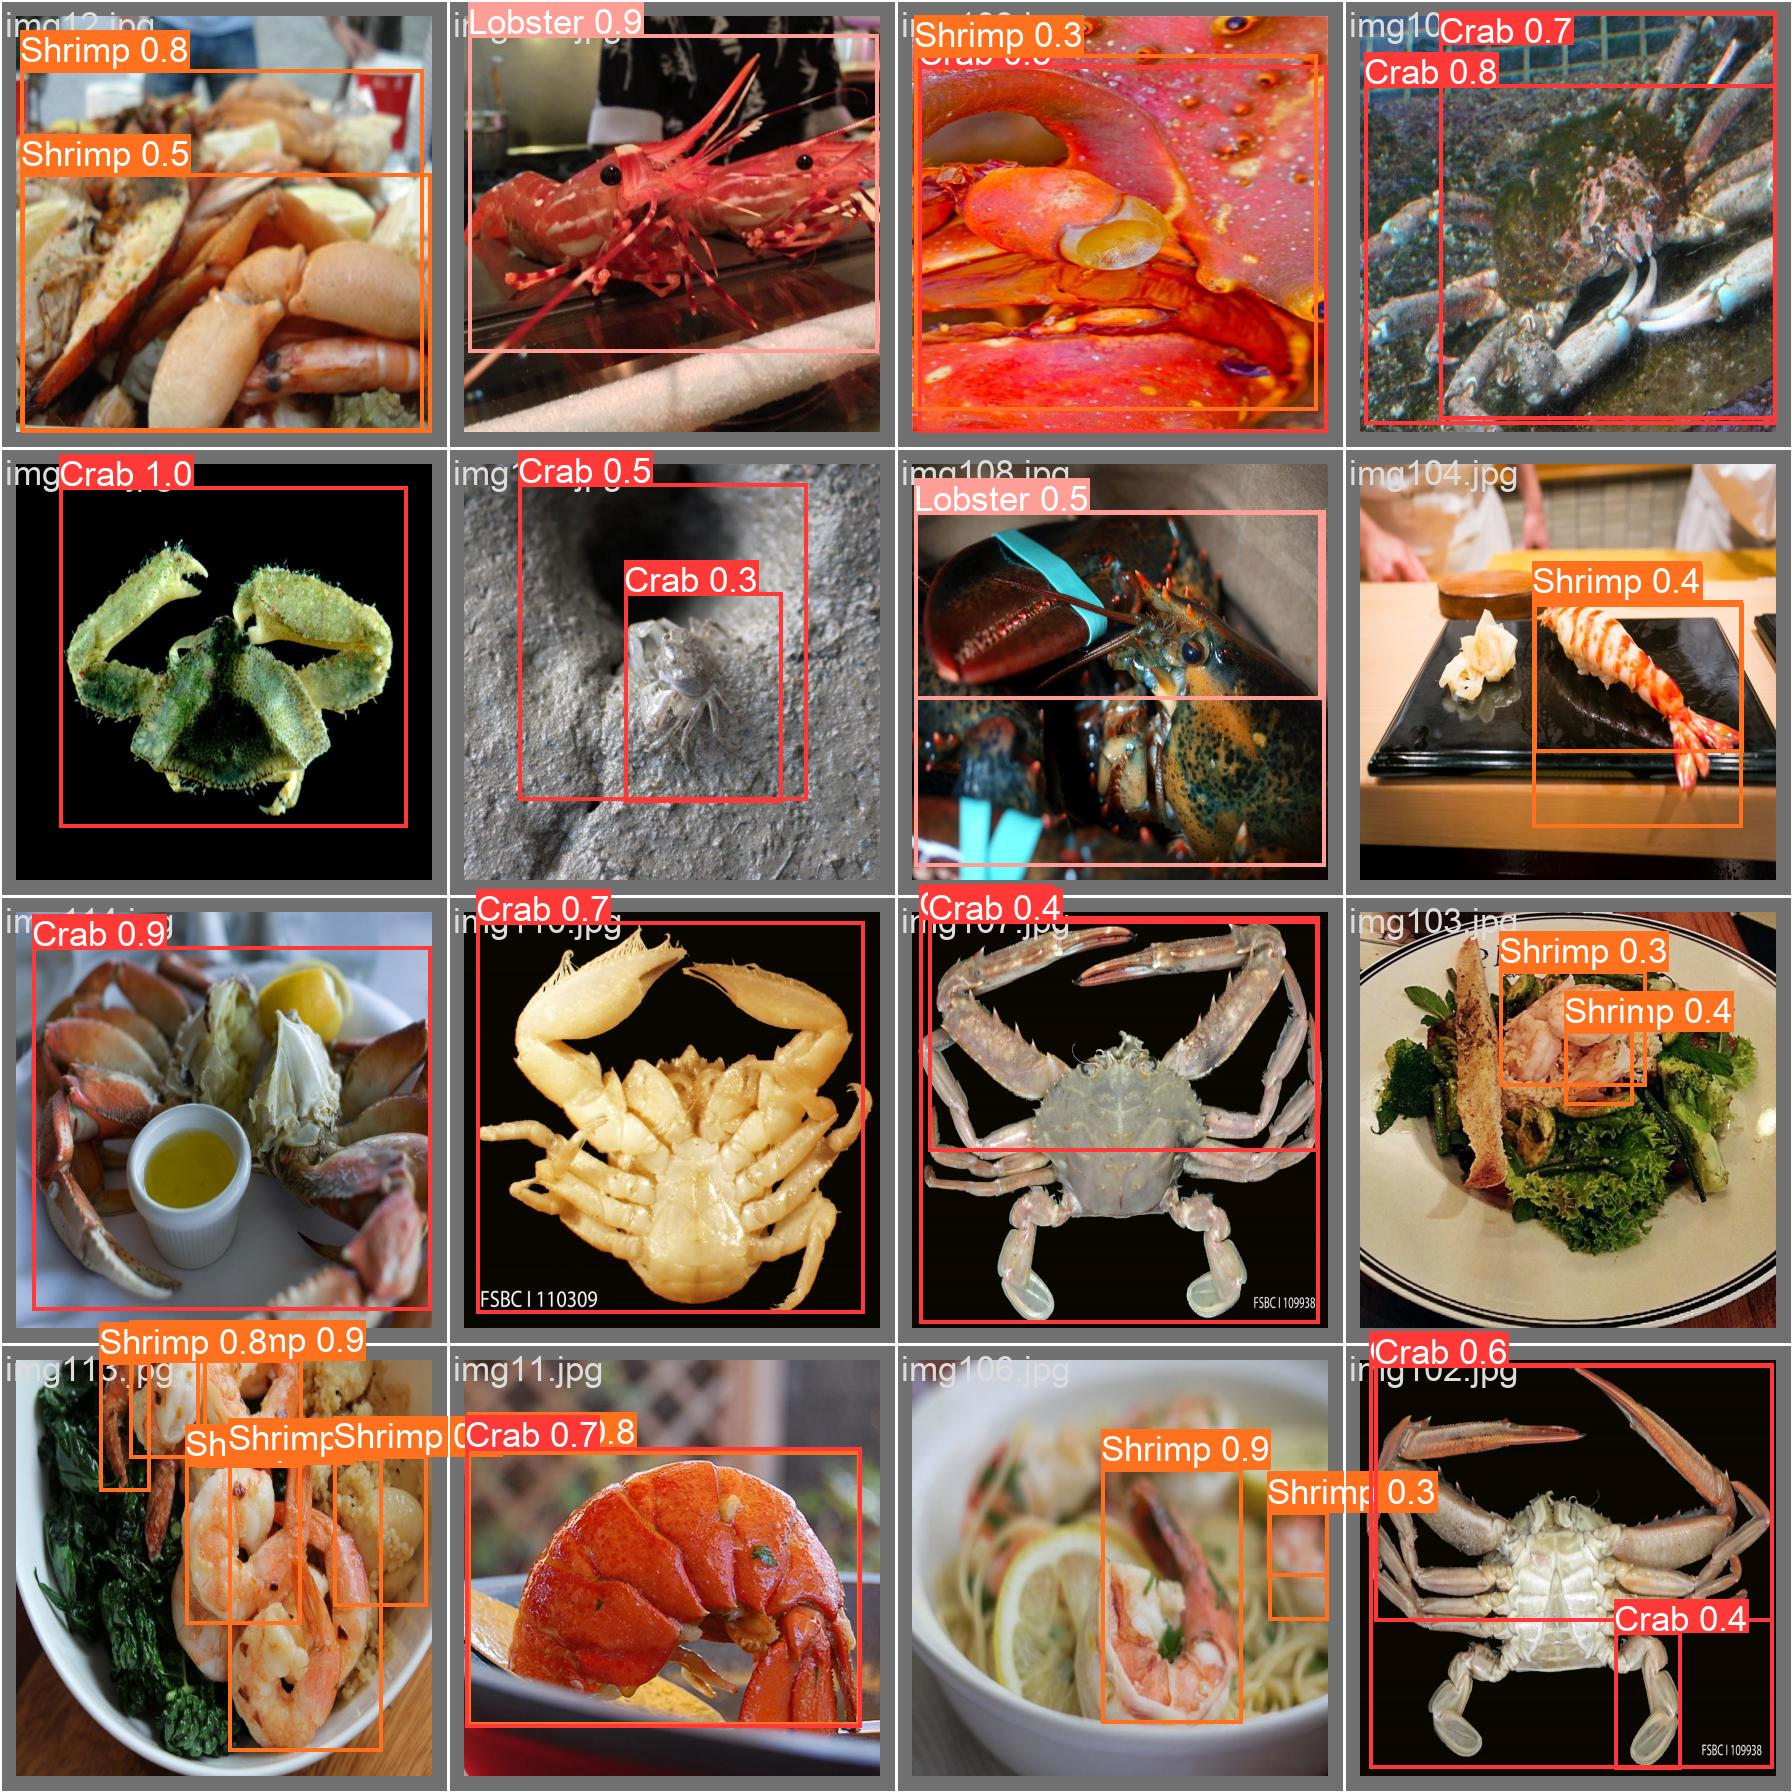

In [4]:
# 検証データ
Image("runs/detect/train/val_batch2_pred.jpg")

## F1 Curve

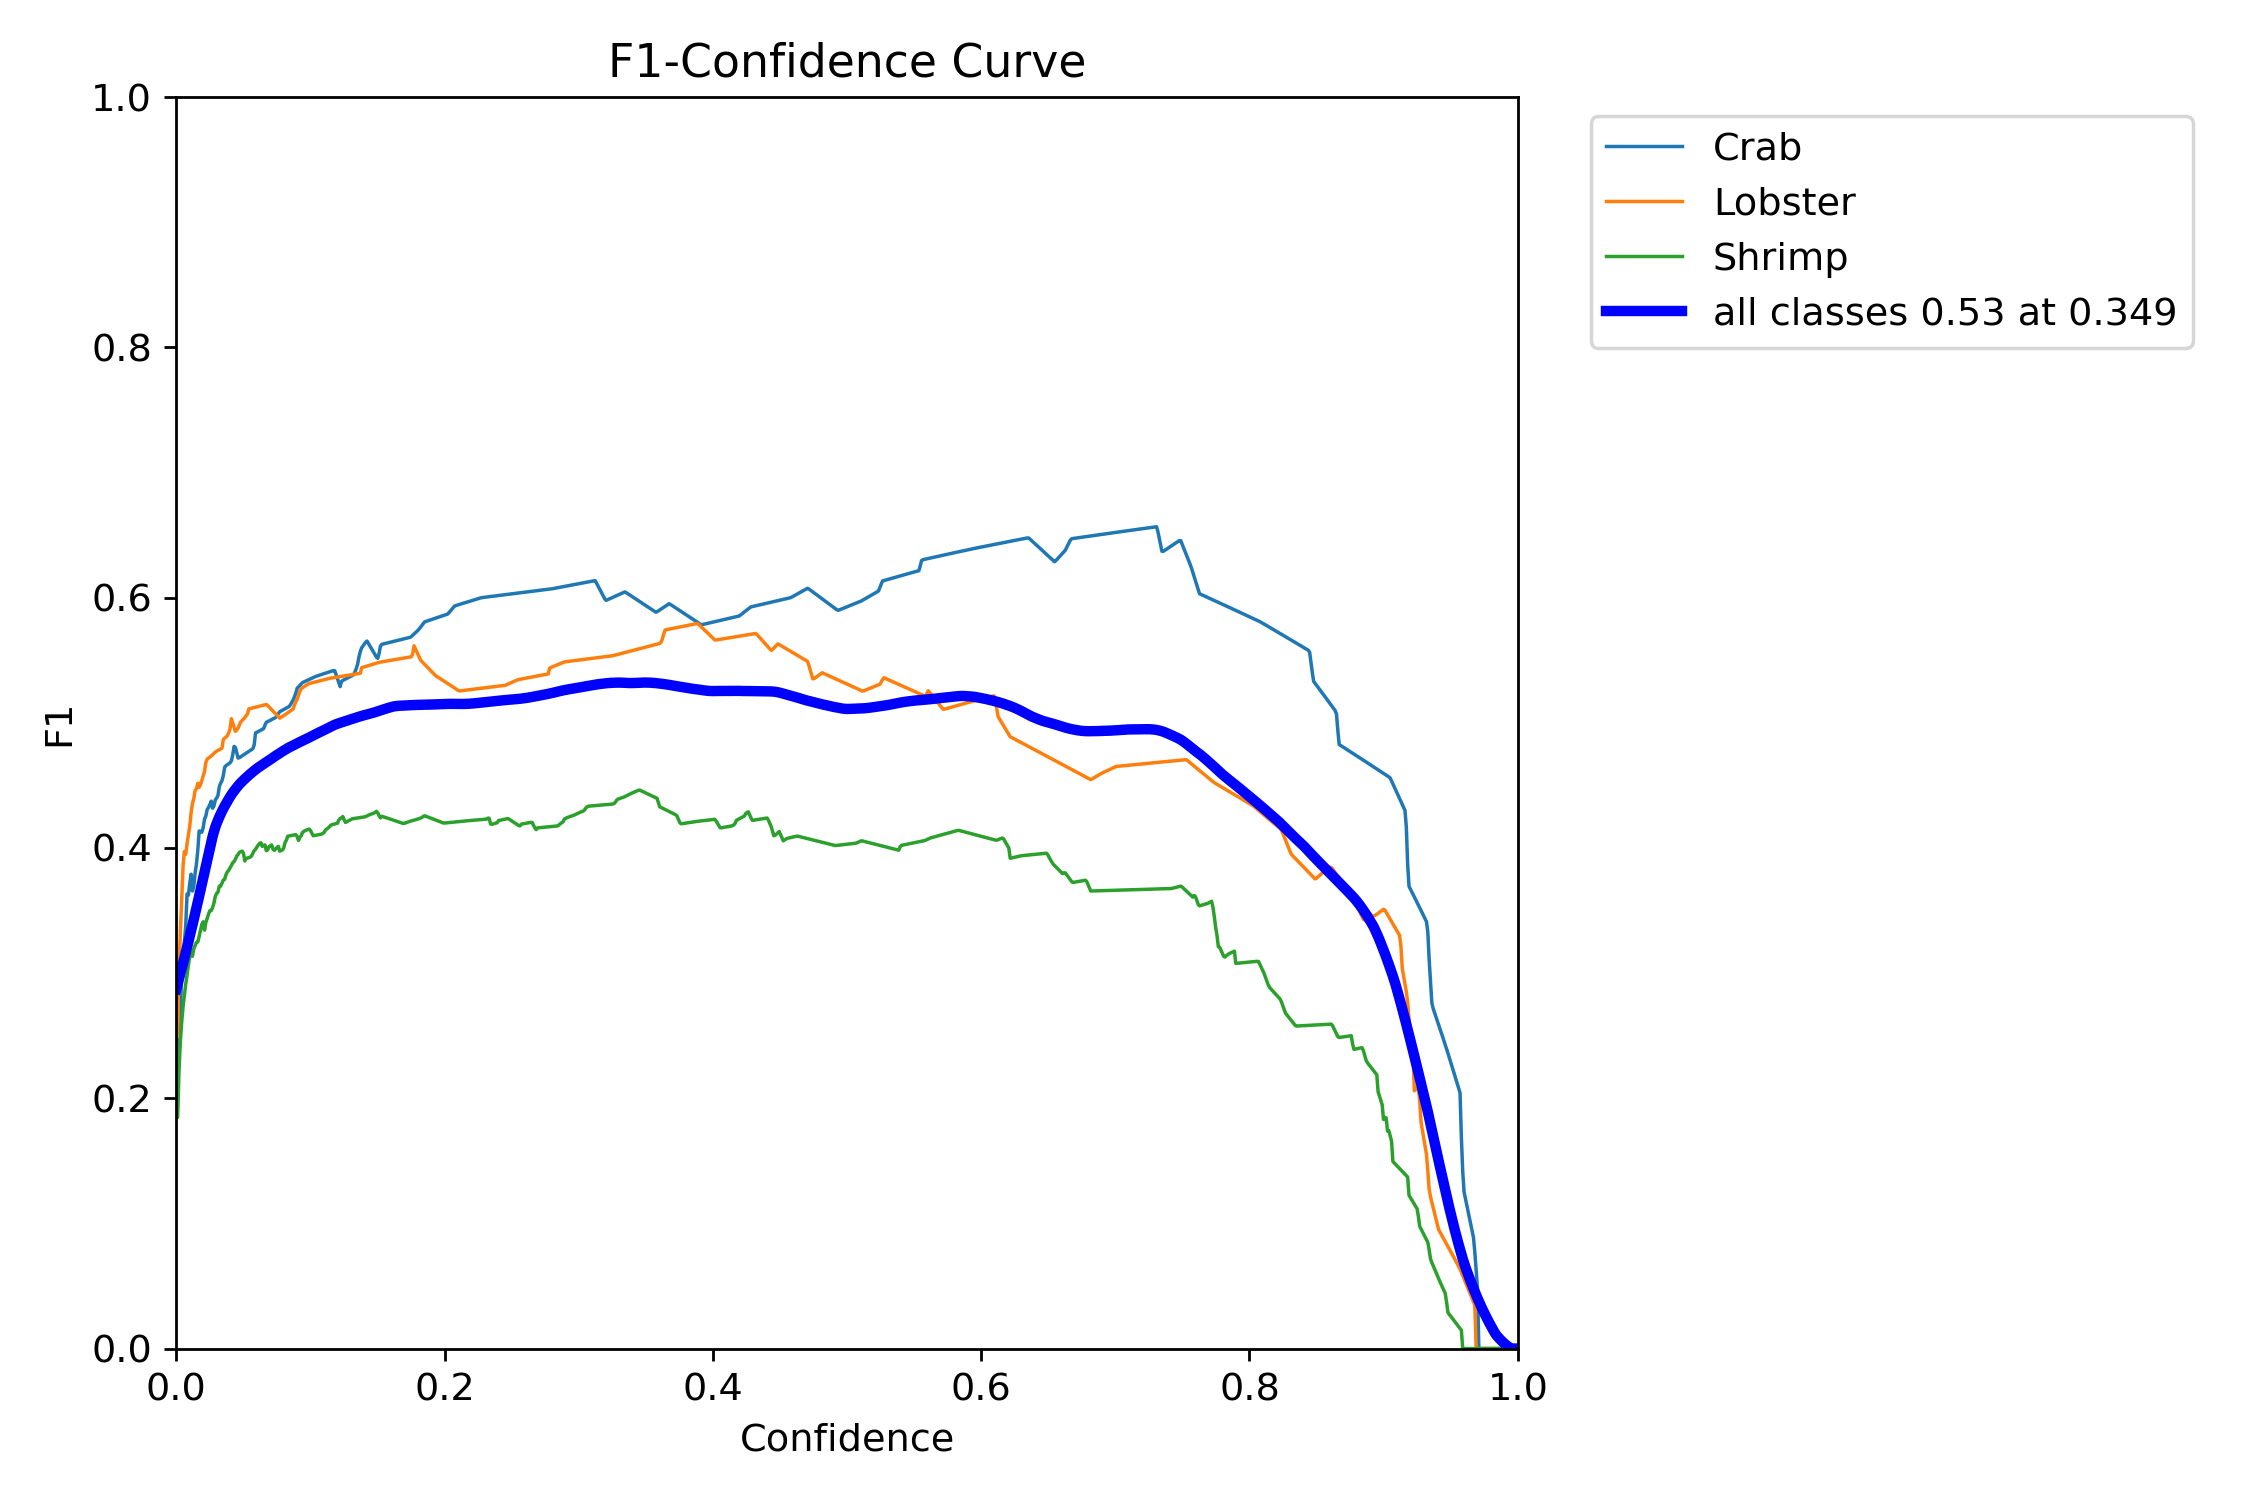

In [5]:
Image("runs/detect/train/F1_curve.png")

## F1-Confidence curve の "all classes 0.53 at 0.489" という評価結果について
F1-Confidence curve は、物体検出や画像分類などのタスクにおいて、検出モデルの性能を評価するために用いられる指標です。"all classes 0.53 at 0.489" は、すべてのクラス に関する F1スコア (0.53) が confidence閾値0.489 で達成されることを意味します。  

詳細な説明:  

all classes: この表記は、すべてのクラス を対象としていることを示します。つまり、F1-Confidence curve は個々のクラスではなく、すべてのクラスをまとめて評価しています。
0.53 at 0.489: この表記は、F1スコア の値が 0.53 であり、confidence閾値が0.489 であることを示します。  
F1スコア は、精度と再現性のバランスを考慮した指標で、0 から 1 の範囲 で、1 に近いほど高い精度と再現性を示します。confidence閾値 は、物体検出における判定基準となる物体スコア (confidence) の閾値です。  

0.53 at 0.489 という評価結果は、以下のことを意味します。  

このモデルは、すべてのクラスにおいて、confidence閾値が 0.489 の場合、F1スコアが 0.53 を達成している。  
つまり、このモデルは、すべてのクラスにおいて、confidence閾値が 0.489 の場合、精度と再現性のバランスが取れていると言える。

## P-R Curve

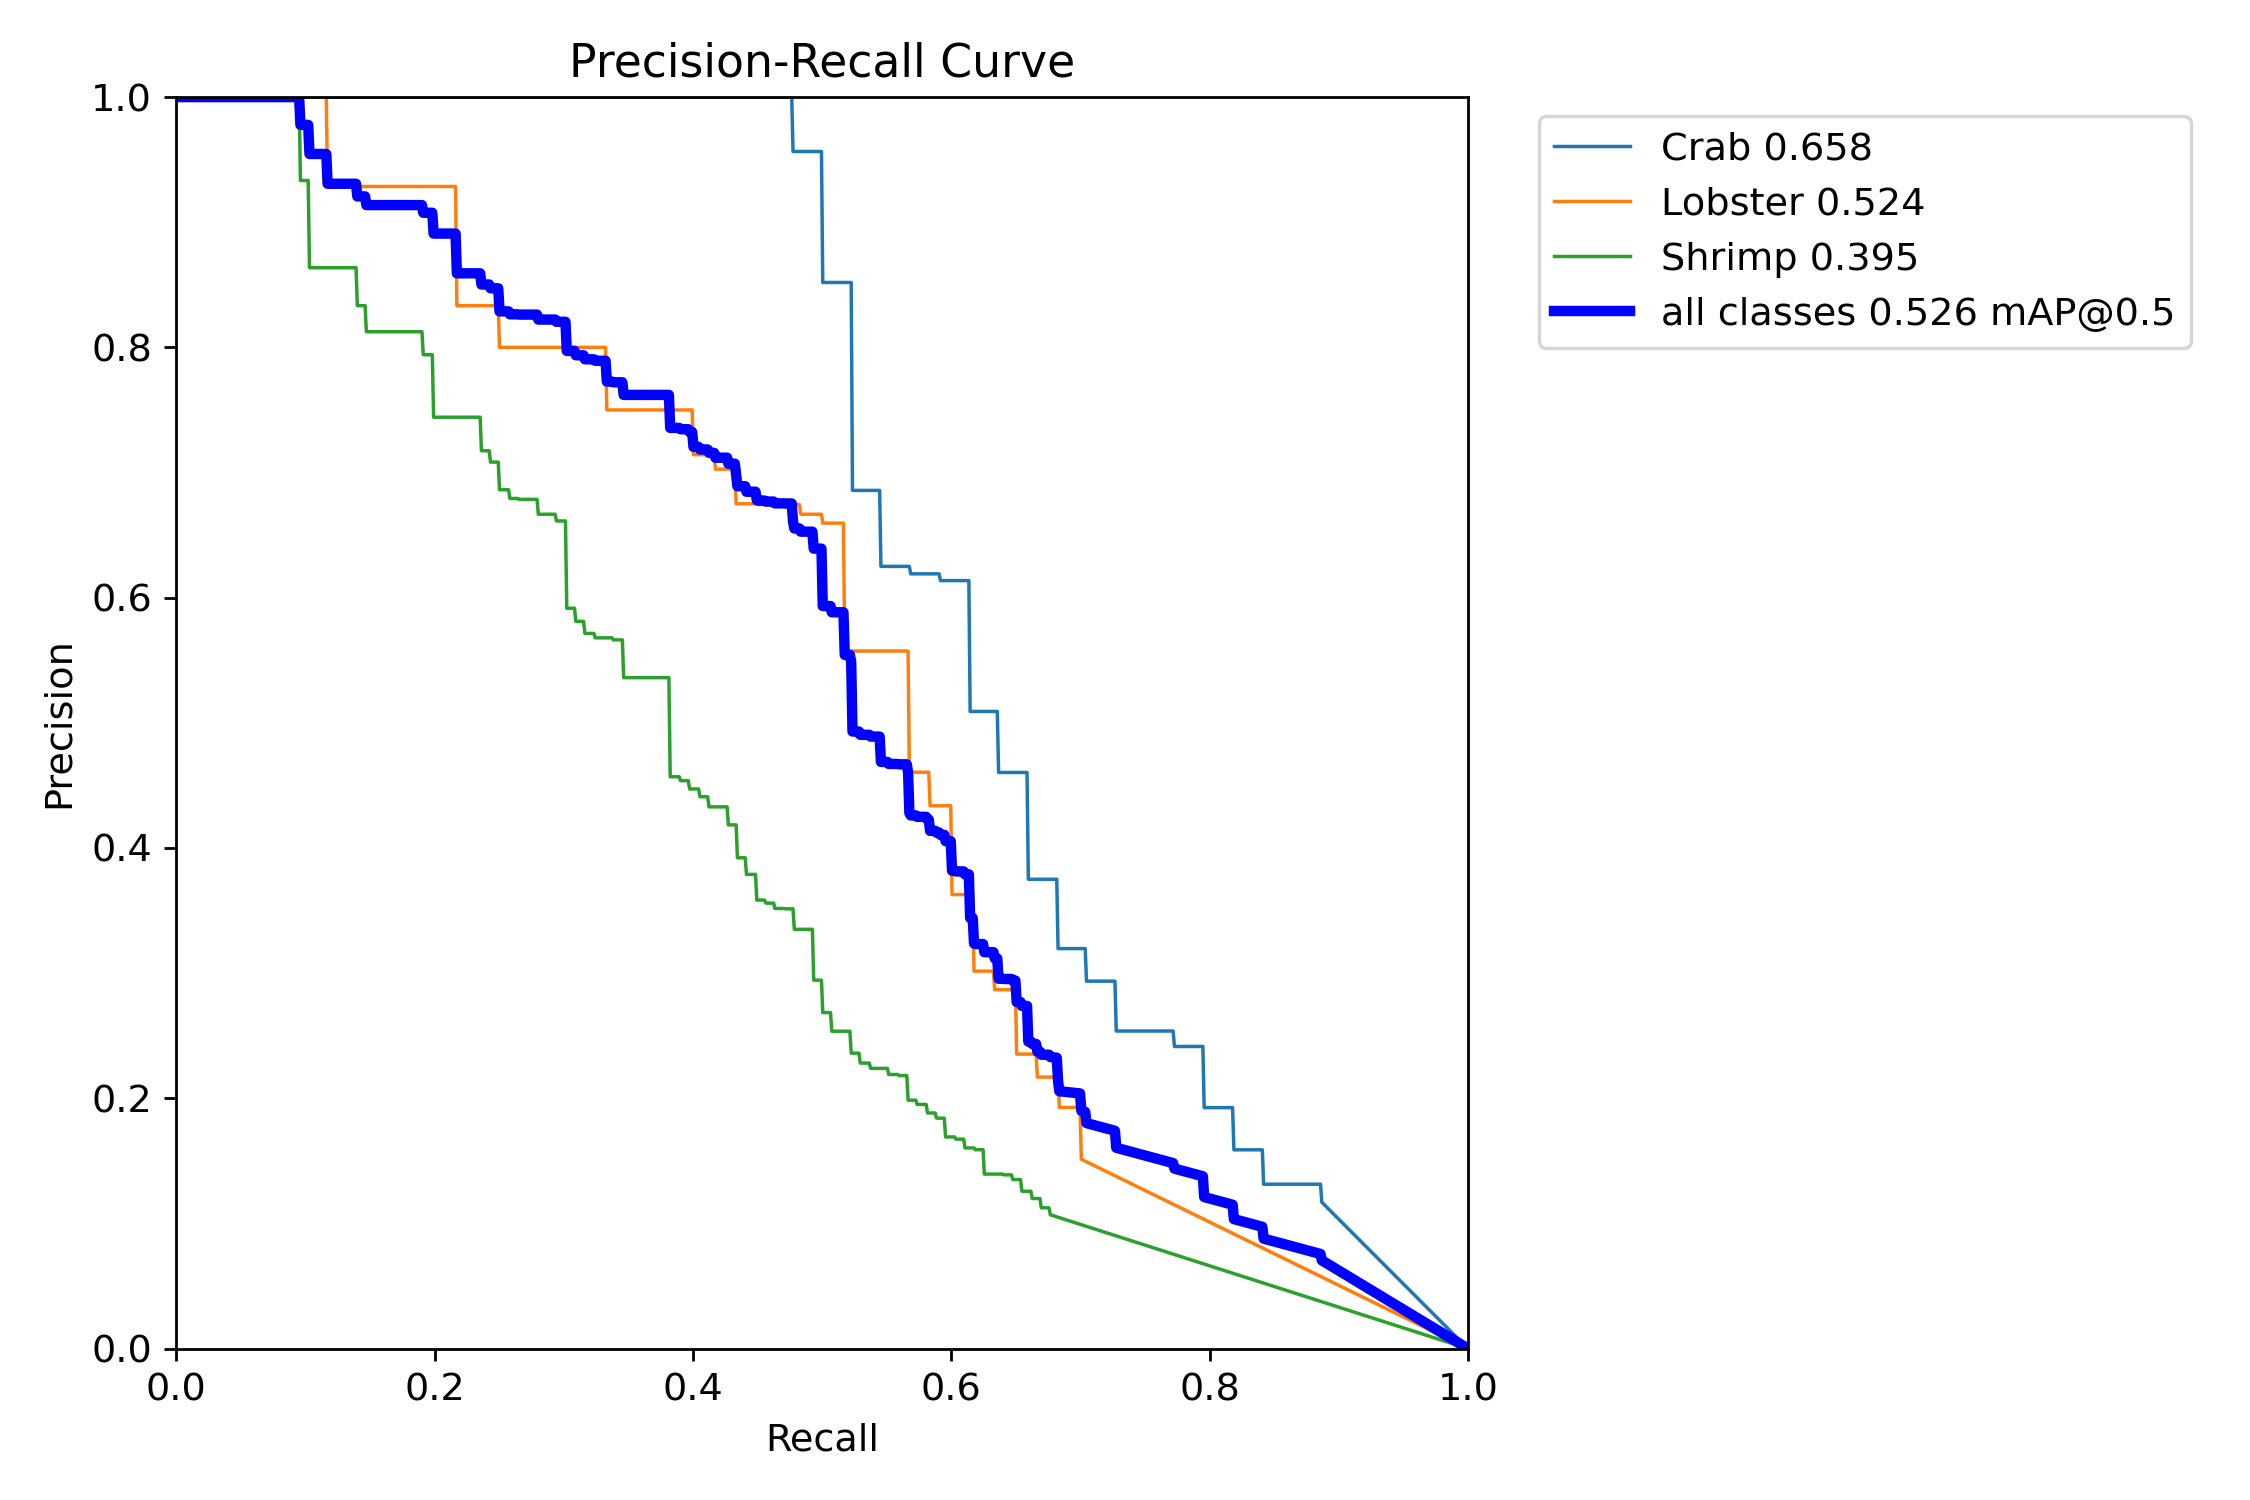

In [6]:
Image("runs/detect/train/PR_curve.png")

## P-R Curveの"all classes 0.512 mAP@0.5" という評価結果について
すべてのクラス における 平均精度 (mAP) が 0.512 であり、IoU閾値が0.5 であることを示します。

詳細な説明:

all classes: この表記は、すべてのクラス を対象としていることを示します。つまり、評価対象は特定のクラスではなく、すべてのクラス をまとめて評価しています。
0.512 mAP@0.5: この表記は、mAP (mean Average Precision) の値が 0.512 であり、IoU閾値が0.5 であることを示します。
mAP (mean Average Precision) は、Precision-Recall curve (PRC) 曲線下積の平均値で、精度と再現性のバランスを考慮した指標です。IoU 閾値は、物体検出における判定基準となる重複率 (Intersection over Union) の閾値です。

0.512 mAP@0.5 という評価結果は、以下のことを意味します。

YOLOv8 モデルは、すべてのクラス において、IoU 閾値が 0.5 の場合、平均精度が 0.512 を達成している。
つまり、このモデルは、**すべてのクラスにおいて、IoU 閾値が 0.5 の場合、精度と再現性のバランスが取れていると言える。

## モデルの評価
このYOLOv8 モデルは、すべてのクラスにおいて、IoU 閾値が 0.5 の場合、平均精度が 0.512 を達成している。つまり、このモデルは、すべてのクラスにおいて、IoU 閾値が 0.5 の場合、精度と再現性のバランスが取れていると言えます。

## onnx形式でモデルを保存

In [7]:
# best_modelの読み込み
best_model = YOLO("runs/detect/train/weights/best.pt")
# 保存
best_model.export(format="onnx")

Ultralytics YOLOv8.2.2  Python-3.10.14 torch-2.2.2+cu118 CPU (13th Gen Intel Core(TM) i7-13700HX)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 7, 3549) (130.4 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success  4.2s, saved as 'runs\detect\train\weights\best.onnx' (260.0 MB)

Export complete (8.4s)
Results saved to C:\Users\yuuki\Kaggle\object_detection_try\shellfish_v2\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=416  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=416 data=data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train\\weights\\best.onnx'